In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import seaborn as sns
from datetime import datetime, date, timedelta
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [2]:
df2019 = pd.read_excel(r'C:\Users\basia\OneDrive\Pulpit\sdu shit\thesis\READY DATASETS\2019_tocombine.xlsx')
df2022 = pd.read_excel(r'C:\Users\basia\OneDrive\Pulpit\sdu shit\thesis\READY DATASETS\2022_tocombine.xlsx')


In [45]:
final=pd.concat([df2019,df2022])
#final.head()

In [46]:
final=final.rename(columns={"Fare Basis Code cut": "Fare", "Org Distribution Channel": "Channel"})

In [47]:
del final['GDS Total Org'], final['Channel'], final['Contact person email'], final ['Org Issuer Company'], final['Full Name'], final ['Fare Basis Code'], final['Ticket Number'], final['Destination']

In [48]:
final['Departure Date']=pd.to_datetime(final['Departure Date'], format='%Y%m%d', errors='ignore')

C:\Users\basia\AppData\Local\Temp\ipykernel_13764\3364003840.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  final['Departure Date']=pd.to_datetime(final['Departure Date'], format='%Y%m%d', errors='ignore')


In [49]:
final.sort_values(by='Departure Date', inplace = True) 

In [50]:
final['Fare'].value_counts()
#WE are only interested in basic, plus, student, senior, premium as those alsie express offer (based on interview with CCO)
Fare= final[['Fare']]
Current_Fare_List=Fare['Fare']
New_Fare_List=[]

for fare in Current_Fare_List:
    if fare in ['STU', 'BAS', 'PLU', 'PRE', 'SEN']:
        New_Fare_List.append(fare)
    else: 
        New_Fare_List.append('Other')
        
Fare['Fare'] = pd.DataFrame(New_Fare_List)
Fare['Fare'].value_counts()
del final['Fare']
final=pd.concat([final, Fare],axis=1)
final.head()

C:\Users\basia\AppData\Local\Temp\ipykernel_13764\2562374089.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fare['Fare'] = pd.DataFrame(New_Fare_List)


,Booking creation time_x,PAX type,Origin,Departure Date,Departure Time,Arrival Date,Arrival Time,SMS Total Org,Booking creation time_y,Booking creation day,Booking Hour,Type,Fare
1176,2018-11-22,Adult,SGD,2019-01-01,15:00,2019-01-01,15:45,499.0,2018-11-22 08:12:33,2018-11-22,8,Business,PLU
1943,2018-12-16,Adult,CPH,2019-01-01,16:15,2019-01-01,17:00,499.0,2018-12-16 14:49:22,2018-12-16,14,Leisure,Other
2885,2018-12-30,Adult,CPH,2019-01-01,16:15,2019-01-01,17:00,349.0,2018-12-30 14:41:23,2018-12-30,14,Leisure,Other
1440,2018-12-02,Adult,SGD,2019-01-01,15:00,2019-01-01,15:45,349.0,2018-12-02 16:01:10,2018-12-02,16,Leisure,BAS
1441,2018-12-02,Child,SGD,2019-01-01,15:00,2019-01-01,15:45,349.0,2018-12-02 16:01:10,2018-12-02,16,Leisure,BAS


# # feature selection 
how different features have impact on demand:
1. create demand column (output column that calculates how many tickets were bought per each flight day)
2. Extract features that might have impact on output
3. Make encoding for nominal variables

In [51]:
values, counts = np.unique(final['Departure Date'], return_counts=True)
#print(counts)

In [52]:
final["Output"] = final.groupby(["Departure Date"])['Departure Date'].transform("count")

In [53]:
final.head()

,Booking creation time_x,PAX type,Origin,Departure Date,Departure Time,Arrival Date,Arrival Time,SMS Total Org,Booking creation time_y,Booking creation day,Booking Hour,Type,Fare,Output
1176,2018-11-22,Adult,SGD,2019-01-01,15:00,2019-01-01,15:45,499.0,2018-11-22 08:12:33,2018-11-22,8,Business,PLU,80
1943,2018-12-16,Adult,CPH,2019-01-01,16:15,2019-01-01,17:00,499.0,2018-12-16 14:49:22,2018-12-16,14,Leisure,Other,80
2885,2018-12-30,Adult,CPH,2019-01-01,16:15,2019-01-01,17:00,349.0,2018-12-30 14:41:23,2018-12-30,14,Leisure,Other,80
1440,2018-12-02,Adult,SGD,2019-01-01,15:00,2019-01-01,15:45,349.0,2018-12-02 16:01:10,2018-12-02,16,Leisure,BAS,80
1441,2018-12-02,Child,SGD,2019-01-01,15:00,2019-01-01,15:45,349.0,2018-12-02 16:01:10,2018-12-02,16,Leisure,BAS,80


In [54]:
#Featurure engineering for different features that might affect final output

In [55]:
#FEATURE ENGINEERING
#final['Departure Date']=pd.to_datetime(final['Departure Date'], format='%m%d', errors='ignore')
final['Arrival Date']=pd.to_datetime(final['Arrival Date'])
#final['Booking creation day']=pd.to_datetime(final['Booking creation day'])
final['Departure Time']=pd.to_datetime(final['Departure Time'], format='%H%M', errors='ignore')
final['Arrival Time']=pd.to_datetime(final['Arrival Time'])
final['Arrival Hour']=pd.to_datetime(final['Arrival Time']).dt.hour
final['Arrival minutes']=pd.to_datetime(final['Arrival Time']).dt.minute
final['Departure Hour']=pd.to_datetime(final['Departure Time']).dt.hour
final['Departure minutes']=pd.to_datetime(final['Departure Time']).dt.minute
#final['Days before']=final['Departure Date']-final["Booking creation day"]
#final['Arrival hour']=pd.to_datetime(final['Arrival Time']).dt.hour
final['Month']=pd.to_datetime(final['Arrival Date']).dt.month
final['Day']=pd.to_datetime(final['Arrival Date']).dt.day
final['Weekday']=pd.to_datetime(final['Arrival Date']).dt.weekday
final['Week']=pd.to_datetime(final['Arrival Date']).dt.isocalendar().week


In [56]:
del final['Booking Hour'], final['Arrival Date'], final['Departure Time'],final['Arrival Time'], final['Booking creation time_x'], final['Booking creation time_y'], final['Booking creation day']

In [57]:
final.head()

,PAX type,Origin,Departure Date,SMS Total Org,Type,Fare,Output,Arrival Hour,Arrival minutes,Departure Hour,Departure minutes,Month,Day,Weekday,Week
1176,Adult,SGD,2019-01-01,499.0,Business,PLU,80,15.0,45.0,15,0,1.0,1.0,1.0,1
1943,Adult,CPH,2019-01-01,499.0,Leisure,Other,80,17.0,0.0,16,15,1.0,1.0,1.0,1
2885,Adult,CPH,2019-01-01,349.0,Leisure,Other,80,17.0,0.0,16,15,1.0,1.0,1.0,1
1440,Adult,SGD,2019-01-01,349.0,Leisure,BAS,80,15.0,45.0,15,0,1.0,1.0,1.0,1
1441,Child,SGD,2019-01-01,349.0,Leisure,BAS,80,15.0,45.0,15,0,1.0,1.0,1.0,1


In [72]:
final["Output"] = final.groupby(['Day', 'Month','Departure Hour', 'Origin'])['Departure Hour'].transform("count")
#output calculates how many tickets were bought for each particular flight
final=final.rename(columns={"SMS Total Org": "Price"})
final.head()
final['Price'] = final['Price'].replace([0.0], 'Nan')
final = final[final.Price!='Nan']
final['Price']=final['Price'].astype(int)
#final.dtypes

In [79]:
#groupin fataset and calculating median of a price
final = final.groupby(['PAX type', 'Origin', 'Type', 'Fare', 'Output', 'Arrival Hour', 'Arrival minutes', 'Day', 'Month','Departure Hour', 'Departure minutes', 'Weekday', 'Week'])['Price'].median()
final=final.reset_index()
#median_prices.set_index('datetime', inplace=True)

In [80]:
median.head()

,PAX type,Origin,Type,Fare,Output,Arrival Hour,Arrival minutes,Day,Month,Departure Hour,Departure minutes,Weekday,Week,Price
0,Adult,CPH,Business,BAS,3.0,9.0,0.0,3.0,2.0,8,15,3.0,5,899.0
1,Adult,CPH,Business,BAS,3.0,16.0,0.0,16.0,11.0,15,15,2.0,46,999.0
2,Adult,CPH,Business,BAS,4.0,9.0,0.0,20.0,1.0,8,15,3.0,3,1349.0
3,Adult,CPH,Business,BAS,4.0,22.0,45.0,17.0,11.0,22,0,3.0,46,549.0
4,Adult,CPH,Business,BAS,5.0,9.0,0.0,21.0,7.0,8,15,3.0,29,399.0


In [81]:
final=final[['PAX type', 'Origin', 'Type', 'Fare', 'Arrival Hour', 'Arrival minutes', 'Day', 'Month','Departure Hour', 'Departure minutes', 'Weekday', 'Week', 'Price', 'Output']]

In [82]:
final.head()

,PAX type,Origin,Type,Fare,Arrival Hour,Arrival minutes,Day,Month,Departure Hour,Departure minutes,Weekday,Week,Price,Output
0,0,False,False,0,9.0,0.0,3.0,2.0,8,15,3.0,5,899.0,3.0
1,0,False,False,0,16.0,0.0,16.0,11.0,15,15,2.0,46,999.0,3.0
2,0,False,False,0,9.0,0.0,20.0,1.0,8,15,3.0,3,1349.0,4.0
3,0,False,False,0,22.0,45.0,17.0,11.0,22,0,3.0,46,549.0,4.0
4,0,False,False,0,9.0,0.0,21.0,7.0,8,15,3.0,29,399.0,5.0


In [83]:
final['PAX type'].value_counts()

0    25289
1     1892
2        2
Name: PAX type, dtype: int64

In [84]:
final['Fare'] = final['Fare'].replace(['BAS'], '0')
final['Fare'] = final['Fare'].replace(['PLU'], '1')
final['Fare'] = final['Fare'].replace(['STU'], '2')
final['Fare'] = final['Fare'].replace(['SEN'], '3')
final['Fare'] = final['Fare'].replace(['PRE'], '4')
final['Fare'] = final['Fare'].replace(['Other'], '5')
final['Fare'] = final['Fare'].astype(int)
final=final.replace({'Origin': {'SGD': True, 'CPH': False}})
final['PAX type'] = final['PAX type'].replace(['Adult'], '0')
final['PAX type'] = final['PAX type'].replace(['Child'], '1')
final['PAX type'] = final['PAX type'].replace(['Infant'], '2')
final['Type'].isna().sum()
final=final.dropna()
final=final.replace({'Type': {'Leisure': True, 'Business': False}})
final.head()

,PAX type,Origin,Type,Fare,Arrival Hour,Arrival minutes,Day,Month,Departure Hour,Departure minutes,Weekday,Week,Price,Output
0,0,False,False,0,9.0,0.0,3.0,2.0,8,15,3.0,5,899.0,3.0
1,0,False,False,0,16.0,0.0,16.0,11.0,15,15,2.0,46,999.0,3.0
2,0,False,False,0,9.0,0.0,20.0,1.0,8,15,3.0,3,1349.0,4.0
3,0,False,False,0,22.0,45.0,17.0,11.0,22,0,3.0,46,549.0,4.0
4,0,False,False,0,9.0,0.0,21.0,7.0,8,15,3.0,29,399.0,5.0


In [86]:
final.shape

(27183, 14)

In [100]:
#devide to input and output
X=final.iloc[:,0:13]
y=final.iloc[:,-1]

In [101]:
#normalize data to eliminate biases
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(x_scaled, columns=X.columns)
X.head()

,PAX type,Origin,Type,Fare,Arrival Hour,Arrival minutes,Day,Month,Departure Hour,Departure minutes,Weekday,Week,Price
0,0.0,0.0,0.0,0.0,0.133333,0.000000,0.066667,0.090909,0.066667,0.333333,0.500000,0.078431,0.390775
1,0.0,0.0,0.0,0.0,0.600000,0.000000,0.500000,0.909091,0.533333,0.333333,0.333333,0.882353,0.434291
2,0.0,0.0,0.0,0.0,0.133333,0.000000,0.633333,0.000000,0.066667,0.333333,0.500000,0.039216,0.586597
3,0.0,0.0,0.0,0.0,1.000000,0.818182,0.533333,0.909091,1.000000,0.000000,0.500000,0.882353,0.238468
4,0.0,0.0,0.0,0.0,0.133333,0.000000,0.666667,0.545455,0.066667,0.333333,0.500000,0.549020,0.173194


## first attempt for feature selection 

In [102]:
from sklearn.ensemble import ExtraTreesRegressor
selection= ExtraTreesRegressor()
selection.fit(X,y)
print(selection.feature_importances_)


[0.00336211 0.04153427 0.0041455  0.00528874 0.09490413 0.05344193
 0.18812109 0.1118013  0.10122175 0.04099315 0.16889378 0.15749911
 0.02879314]


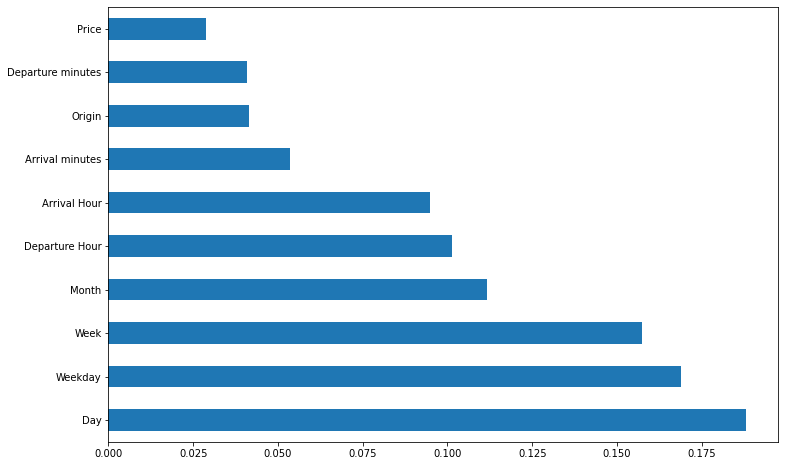

In [103]:
#plot

plt.figure(figsize=(12,8))
feat_importances=pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind="barh")
plt.show()

In [ ]:
#DAY, #WEEK, #WEEKDAY #MONTH, #DEPARTURE HOUR #ARRIVAL HOUR #ARRIVAL MINUTES #

# # second attempt: forward selection 
https://www.analyticsvidhya.com/blog/2021/04/forward-feature-selection-and-its-implementation/


In [94]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

In [95]:
lreg = LinearRegression()
sfs1 = sfs(lreg, k_features=7, forward=True, verbose=2, scoring='neg_mean_squared_error')

In [96]:
sfs1 = sfs1.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.3s finished

[2023-04-23 12:57:42] Features: 1/7 -- score: -211.6490714121815[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.4s finished

[2023-04-23 12:57:43] Features: 2/7 -- score: -208.1043759940059[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.4s finished

[2023-04-23 12:57:43] Features: 3/7 -- score: -206.76530342544947[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

In [97]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

[0, 1, 5, 7, 8, 9, 10]


# backward selection:
https://www.analyticsvidhya.com/blog/2021/04/backward-feature-elimination-and-its-implementation/

In [249]:
lreg = LinearRegression()
sfs1 = sfs(lreg, k_features=7, forward=False, verbose=2, scoring='neg_mean_squared_error')
sfs1 = sfs1.fit(X, y)
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    6.7s finished

[2023-03-15 12:09:52] Features: 11/7 -- score: -118.55766907192128[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    5.8s finished

[2023-03-15 12:09:58] Features: 10/7 -- score: -118.48550472381278[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    5.0s finished

[2023-03-15 12:10:03] Features: 9/7 -- score: -118.4690977291018[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 

['Departure Hour', 'PAX type', 'Type', 'Price', 'Departure minutes', 'Days before', 'Arrival hour']


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    3.5s finished

[2023-03-15 12:10:11] Features: 7/7 -- score: -118.91634871615388

## selection:

first method: Days before, departure hour, booking day, booking month, price, arrival hour, departure minutes, location (normalizing data does not change anything)
second method: 'Origin', 'PAX type', 'Type', 'Fare', 'Price', 'Days before', 'Booking Hour'
third method: 'Departure Hour', 'PAX type', 'Type', 'Price', 'Departure minutes', 'Days before', 'Arrival hour'

overal features: Days before, departure hour, Departure minutes, Price, Location
we are gonna skips booking day and month as it can be calculated from days befroe and departure date